<a href="https://colab.research.google.com/github/JuelGeorge/Adaptive_BCI_2D/blob/main/MI_Online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
while 1:
  pass

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
data=np.load('/content/redoE1601223.npy')

data_train=data[:200,:]
data_val=data[200:400,:]
data_test=data[400:,:]
feat_train=data_train[:,:12]
feat_val=data_val[:,:12]
feat_test=data_test[:,:12]
labels_train=data_train[:,12]
labels_val=data_val[:,12]
labels_test=data_test[:,12]

In [ ]:
n_left=len(np.where(labels_train==1)[0])
n_right=len(np.where(labels_train==2)[0])

In [ ]:
print(n_left)
print(n_right)

108
92


In [ ]:
r_labels_train=list()
for i in labels_train:
  if(i==1):
    r_labels_train.append([0,1])
  else:
    r_labels_train.append([1,0])
r_labels_train=np.array(r_labels_train)

In [ ]:
r_labels_test=list()
for i in labels_test:
  if(i==1):
    r_labels_test.append([0,1])
  else:
    r_labels_test.append([1,0])
r_labels_test=np.array(r_labels_test)

In [ ]:
r_labels_val=list()
for i in labels_val:
  if(i==1):
    r_labels_val.append([0,1])
  else:
    r_labels_val.append([1,0])
r_labels_val=np.array(r_labels_val)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import *

#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus:
  #tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
offline_model = Sequential()
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(feat_train)
reg = tf.keras.regularizers.L2(l2=0.01)
offline_model.add(InputLayer(input_shape=(12)))
offline_model.add(normalizer)
#Stage 1
offline_model.add(Dense(10,activation='relu'))
offline_model.add(Dropout(0.2))
#Stage 2
offline_model.add(Dense(10,activation='relu'))
offline_model.add(Dropout(0.2))


#Stage 3
offline_model.add(Dense(10,activation='relu'))
offline_model.add(Dropout(0.2))


#Stage 4
#offline_model.add(Dense(100,activation='relu'))
#offline_model.add(Dense(100,activation='relu'))
#offline_model.add(Dense(100,activation='relu'))

#model.add(Dropout(0.1))


#Stage 5
offline_model.add(Dense(units=2,activation='softmax'))

In [ ]:
opt = tf.keras.optimizers.experimental.Adam(learning_rate=0.0005)
offline_model.compile(opt, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
history_offline=offline_model.fit(feat_train,r_labels_train, batch_size = 10, epochs = 50,validation_data=(feat_test,r_labels_test))

Epoch 1/50
20/20 [==============================] - 3s 63ms/step - loss: 0.6991 - accuracy: 0.5400 - val_loss: 0.7362 - val_accuracy: 0.4854
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 0.7033 - accuracy: 0.5350 - val_loss: 0.7294 - val_accuracy: 0.4951
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 0.7089 - accuracy: 0.5250 - val_loss: 0.7224 - val_accuracy: 0.5049
Epoch 4/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6769 - accuracy: 0.6050 - val_loss: 0.7188 - val_accuracy: 0.5049
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 0.7062 - accuracy: 0.5500 - val_loss: 0.7146 - val_accuracy: 0.5146
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 0.6722 - accuracy: 0.6100 - val_loss: 0.7112 - val_accuracy: 0.5340
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5600 - val_loss: 0.7082 - val_accuracy: 0.5340
Epoch 8/50
20/20 [=

In [ ]:
%75 percent accuracte
opt = tf.keras.optimizers.experimental.Adam(learning_rate=0.0001)
model.compile(opt, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
history=model.fit(feat_train,r_labels_train, batch_size = 20, epochs = 200,validation_data=(feat_test,r_labels_test))

UsageError: Line magic function `%75` not found.


Train results on set 1.

In [ ]:
eventsPred = offline_model.predict(feat_train)
eventsClasses = np.argmax(eventsPred,axis=1)

7/7 [==============================] - 0s 2ms/step


In [ ]:
eventsClasses_true = np.argmax(r_labels_train,axis=1)

In [ ]:
acc=accuracy_score(eventsClasses_true,eventsClasses)
pre=precision_score(eventsClasses_true,eventsClasses)
rec=recall_score(eventsClasses_true,eventsClasses)

Training results set1

In [ ]:
print(acc)
print(pre)
print(rec)

0.85
0.8333333333333334
0.8333333333333334


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['accuracy'],label='accuracy')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(history.history['val_accuracy'],label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

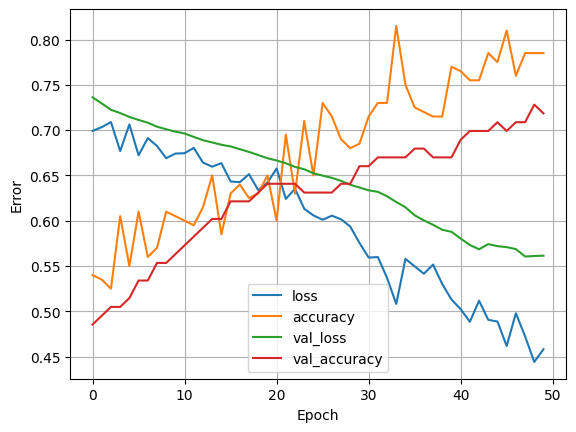

In [ ]:
plot_loss(history_offline)

In [ ]:
eventsPred_test = offline_model.predict(feat_test)
eventsClasses_test = np.argmax(eventsPred_test,axis=1)
eventsClasses_true_test = np.argmax(r_labels_test,axis=1)
acc=accuracy_score(eventsClasses_true_test,eventsClasses_test)
pre=precision_score(eventsClasses_true_test,eventsClasses_test)
rec=recall_score(eventsClasses_true_test,eventsClasses_test)

4/4 [==============================] - 2s 519ms/step


In [ ]:
print(acc)
print(pre)
print(rec)

0.7184466019417476
0.7692307692307693
0.6


Post online training

In [ ]:
eventsPred_test = offline_model.predict(feat_test)
eventsClasses_test = np.argmax(eventsPred_test,axis=1)
eventsClasses_true_test = np.argmax(r_labels_test,axis=1)
acc=accuracy_score(eventsClasses_true_test,eventsClasses_test)
pre=precision_score(eventsClasses_true_test,eventsClasses_test)
rec=recall_score(eventsClasses_true_test,eventsClasses_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
print(acc)
print(pre)
print(rec)

0.8155339805825242
0.8444444444444444
0.76


In [ ]:
loss_fn=tf.losses.BinaryCrossentropy()


In [ ]:
batch_size=1
online_train_dataset = tf.data.Dataset.from_tensor_slices((feat_val,r_labels_val))
online_train_dataset=online_train_dataset.batch(batch_size)

In [ ]:
def modify_label(x):
  if (x==[0,1]).all():
    x=[1,0]
  else: 
    x=[0,1]
  return np.array(x)


In [ ]:
import random

In [ ]:
for s, (f,l) in enumerate(online_train_dataset):
  print(s,f,l)

In [ ]:
epochs = 50
epoch_acc=[]

for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    c=0
    mc=0
    for step, (f,l) in enumerate(online_train_dataset):
            
        rn=random.uniform(0,1)
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:
        
            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = offline_model(f, training=True)  # Logits for this minibatch
            pred_label=np.argmax(logits)
            act_label=np.argmax(np.array(l))
            if act_label==pred_label:
             c+=1
             if rn<= 0.8:
             # Compute the loss value for this minibatch.
             
               loss_value = loss_fn(tf.reshape(l,(1,2)), logits)
               grads = tape.gradient(loss_value, offline_model.trainable_weights)
               opt.apply_gradients(zip(grads, offline_model.trainable_weights))
             else:
               l_mod=tf.convert_to_tensor(modify_label(np.array(l)))
               loss_value = loss_fn(tf.reshape(l_mod,(1,2)), logits)
               grads = tape.gradient(loss_value, offline_model.trainable_weights)
               opt.apply_gradients(zip(grads, offline_model.trainable_weights))
            else:
              mc+=1
              if rn<= 0.9:
             # Compute the loss value for this minibatch.
             
               loss_value = loss_fn(tf.reshape(l,(1,2)), logits)
               grads = tape.gradient(loss_value, offline_model.trainable_weights)
               opt.apply_gradients(zip(grads, offline_model.trainable_weights))
              else:
               l_mod=tf.convert_to_tensor(modify_label(np.array(l)))
               loss_value = loss_fn(tf.reshape(l_mod,(1,2)), logits)
               grads = tape.gradient(loss_value, offline_model.trainable_weights)
               opt.apply_gradients(zip(grads, offline_model.trainable_weights))
    eventsPred_test = offline_model.predict(feat_test)
    eventsClasses_test = np.argmax(eventsPred_test,axis=1)
    eventsClasses_true_test = np.argmax(r_labels_test,axis=1)
    acc=accuracy_score(eventsClasses_true_test,eventsClasses_test)
    epoch_acc.append(acc)  
    print("epoch acc",(float(acc)))
      


Start of epoch 0


4/4 [==============================] - 1s 328ms/step
epoch acc 0.7961165048543689

Start of epoch 1
4/4 [==============================] - 0s 3ms/step
epoch acc 0.8058252427184466

Start of epoch 2
4/4 [==============================] - 0s 105ms/step
epoch acc 0.8058252427184466

Start of epoch 3
4/4 [==============================] - 0s 101ms/step
epoch acc 0.7961165048543689

Start of epoch 4
4/4 [==============================] - 0s 51ms/step
epoch acc 0.7961165048543689

Start of epoch 5
4/4 [==============================] - 0s 4ms/step
epoch acc 0.8058252427184466

Start of epoch 6
4/4 [==============================] - 1s 244ms/step
epoch acc 0.7766990291262136

Start of epoch 7
4/4 [==============================] - 0s 3ms/step
epoch acc 0.7766990291262136

Start of epoch 8
4/4 [==============================] - 0s 3ms/step
epoch acc 0.7864077669902912

Start of epoch 9
4/4 [==============================] - 0s 28ms/step
epoch acc 0.7864077669902912

Start of epoch 10
4/4 [====

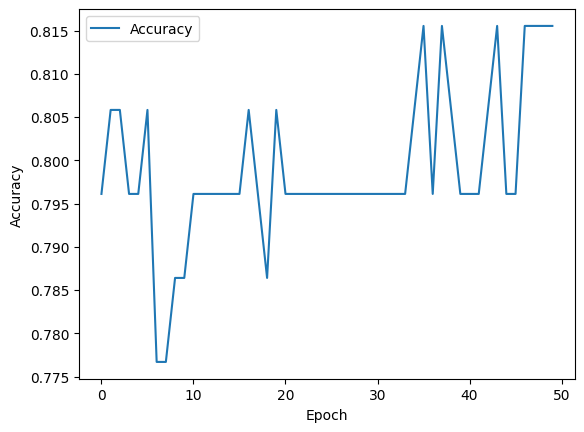

In [ ]:
plt.ylim=(0.71)
plt.plot(epoch_acc,label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()